In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv("C://Users//bhara//Desktop//Datasets//Houseprice.csv")

In [4]:
data.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [5]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
cols_to_use=["BsmtQual","FireplaceQu","SalePrice"]

In [7]:
data=pd.read_csv("C://Users//bhara//Desktop//Datasets//Houseprice.csv",usecols=cols_to_use)

In [8]:
data.head(3)

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500


In [9]:
data.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(data,data["SalePrice"],test_size=0.3,random_state=0,)

In [11]:
X_train.shape

(1022, 3)

In [12]:
X_test.shape

(438, 3)

Text(0, 0.5, 'Number of houses')

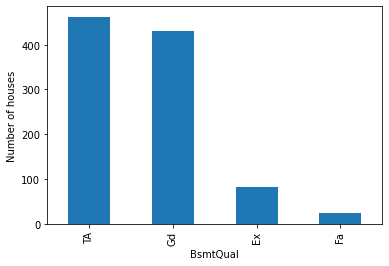

In [17]:
X_train["BsmtQual"].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel("BsmtQual")
plt.ylabel("Number of houses")

In [18]:
X_train["BsmtQual"].mode()

0    TA
dtype: object

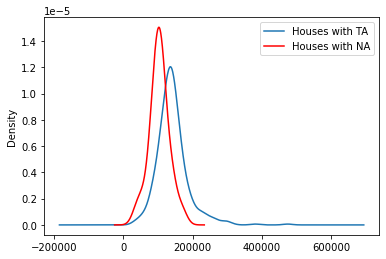

In [19]:
fig=plt.figure()
ax=fig.add_subplot(111)
X_train[X_train["BsmtQual"]=="TA"]["SalePrice"].plot(kind="kde",ax=ax)
X_train[X_train["BsmtQual"].isnull()]["SalePrice"].plot(kind="kde",ax=ax,color="red")
lines,labels=ax.get_legend_handles_labels()
labels=["Houses with TA","Houses with NA"]
ax.legend(lines,labels,loc="best")

In [21]:
tmp=X_train[X_train["BsmtQual"]=="TA"]["SalePrice"]

In [22]:
X_train["BsmtQual"].fillna("TA",inplace=True)
X_test["BsmtQual"].fillna("TA",inplace=True)

C:\Users\bhara\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [23]:
X_train["BsmtQual"].isnull().sum()

0

Text(0, 0.5, 'Number of Houses')

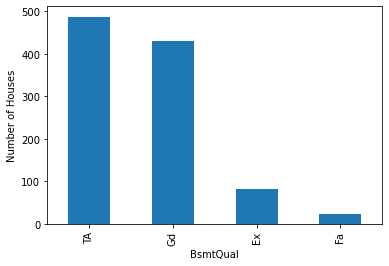

In [24]:
X_train["BsmtQual"].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel("BsmtQual")
plt.ylabel("Number of Houses")

Text(0.5, 1.0, 'BsmtQual')

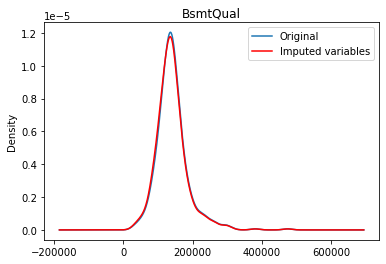

In [29]:
fig=plt.figure()
ax=fig.add_subplot(111)
tmp.plot(kind="kde",ax=ax)
X_train[X_train["BsmtQual"]=="TA"]["SalePrice"].plot(kind="kde",ax=ax,color="red")
lines,labels= ax.get_legend_handles_labels()
labels = ["Original","Imputed variables"]
ax.legend(lines,labels,loc="best")
plt.title("BsmtQual")